In [ ]:
# Import libararies and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("./traffic-signs-data/train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)  
with open("./traffic-signs-data/test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_test.shape

(12630, 32, 32, 3)

In [7]:
y_test.shape

(12630,)

In [8]:
# Image Exploration

41

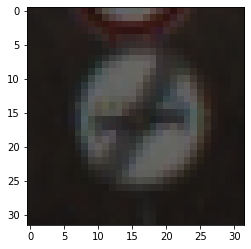

In [9]:
i = 8
plt.imshow(X_train[i])
y_train[i]

In [10]:
# Data Preparation

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [13]:
X_train_gray.shape

(34799, 32, 32, 1)

In [14]:
X_train_gray_norm = (X_train_gray -128)/128
X_test_gray_norm = (X_test_gray -128)/128
X_validation_gray_norm = (X_validation_gray -128)/128

In [15]:
X_train_gray_norm

array([[[[-0.57291667],
         [-0.54427083],
         [-0.45052083],
         ...,
         [-0.63802083],
         [-0.65625   ],
         [-0.6171875 ]],

        [[-0.640625  ],
         [-0.59635417],
         [-0.53125   ],
         ...,
         [-0.625     ],
         [-0.66145833],
         [-0.66145833]],

        [[-0.65625   ],
         [-0.62760417],
         [-0.56510417],
         ...,
         [-0.63802083],
         [-0.68229167],
         [-0.63020833]],

        ...,

        [[-0.68229167],
         [-0.63020833],
         [-0.5703125 ],
         ...,
         [-0.52083333],
         [-0.5       ],
         [-0.59635417]],

        [[-0.640625  ],
         [-0.58854167],
         [-0.578125  ],
         ...,
         [-0.53645833],
         [-0.5703125 ],
         [-0.61197917]],

        [[-0.6484375 ],
         [-0.57291667],
         [-0.57552083],
         ...,
         [-0.54427083],
         [-0.66145833],
         [-0.69791667]]],


       [[[-0.640625  ],


<Figure size 432x288 with 0 Axes>

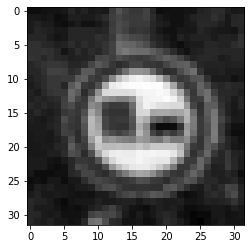

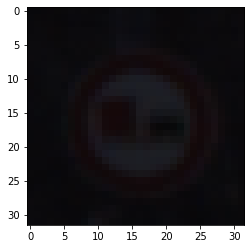

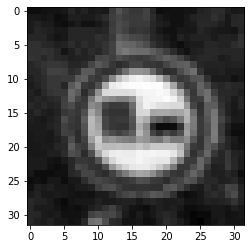

<Figure size 432x288 with 0 Axes>

In [16]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray' )
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray' )
plt.figure()



In [93]:
# Model Training

<Figure size 432x288 with 0 Axes>

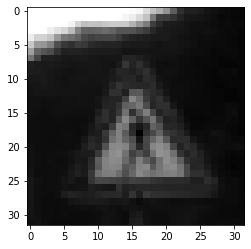

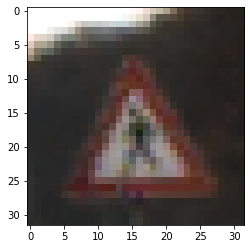

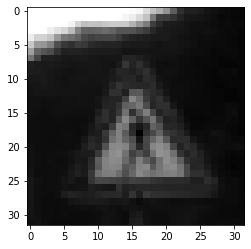

<Figure size 432x288 with 0 Axes>

In [17]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray' )
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray' )
plt.figure()

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [19]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation = 'relu', input_shape = (32,32,1))) 
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [22]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = 'accuracy')

In [23]:
history = cnn_model.fit(X_train_gray_norm,
              y_train,
              batch_size = 500,
              epochs = 50,
              verbose = 1,
              validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 4s 49ms/step - loss: 2.8037 - accuracy: 0.2790 - val_loss: 2.2218 - val_accuracy: 0.3943
Epoch 2/50
70/70 [==============================] - 3s 46ms/step - loss: 1.4349 - accuracy: 0.6096 - val_loss: 1.4393 - val_accuracy: 0.5925
Epoch 3/50
70/70 [==============================] - 3s 46ms/step - loss: 0.9072 - accuracy: 0.7583 - val_loss: 1.1052 - val_accuracy: 0.6857
Epoch 4/50
70/70 [==============================] - 3s 46ms/step - loss: 0.6593 - accuracy: 0.8320 - val_loss: 0.9484 - val_accuracy: 0.7234
Epoch 5/50
70/70 [==============================] - 3s 49ms/step - loss: 0.5265 - accuracy: 0.8678 - val_loss: 0.8857 - val_accuracy: 0.7506
Epoch 6/50
70/70 [==============================] - 3s 47ms/step - loss: 0.4467 - accuracy: 0.8864 - val_loss: 0.8134 - val_accuracy: 0.7794
Epoch 7/50
70/70 [==============================] - 3s 47ms/step - loss: 0.3764 - accuracy: 0.9091 - val_loss: 0.7762 - val_accuracy: 0.7900
Epoch 8/50
70

In [24]:
 # Model Evaluation

In [25]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.1893 - accuracy: 0.8557
Test Accuracy 0.855661153793335


In [26]:
y_test.shape

(12630,)

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

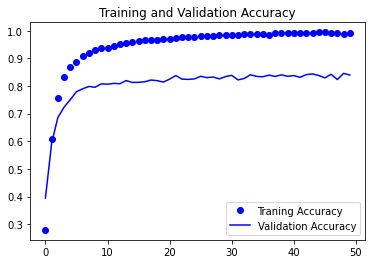

In [34]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Traning Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

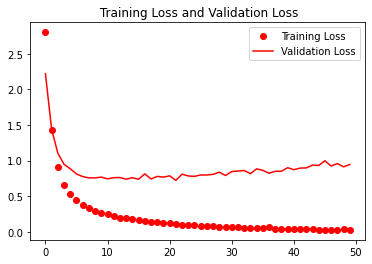

In [45]:
epochs = range(len(loss))
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title(' Training Loss and Validation Loss')
plt.legend()

In [80]:
predict_x=cnn_model.predict(X_test_gray_norm) 
classes_x=np.argmax(predict_x,axis=1)
y_true = y_test

<AxesSubplot:>

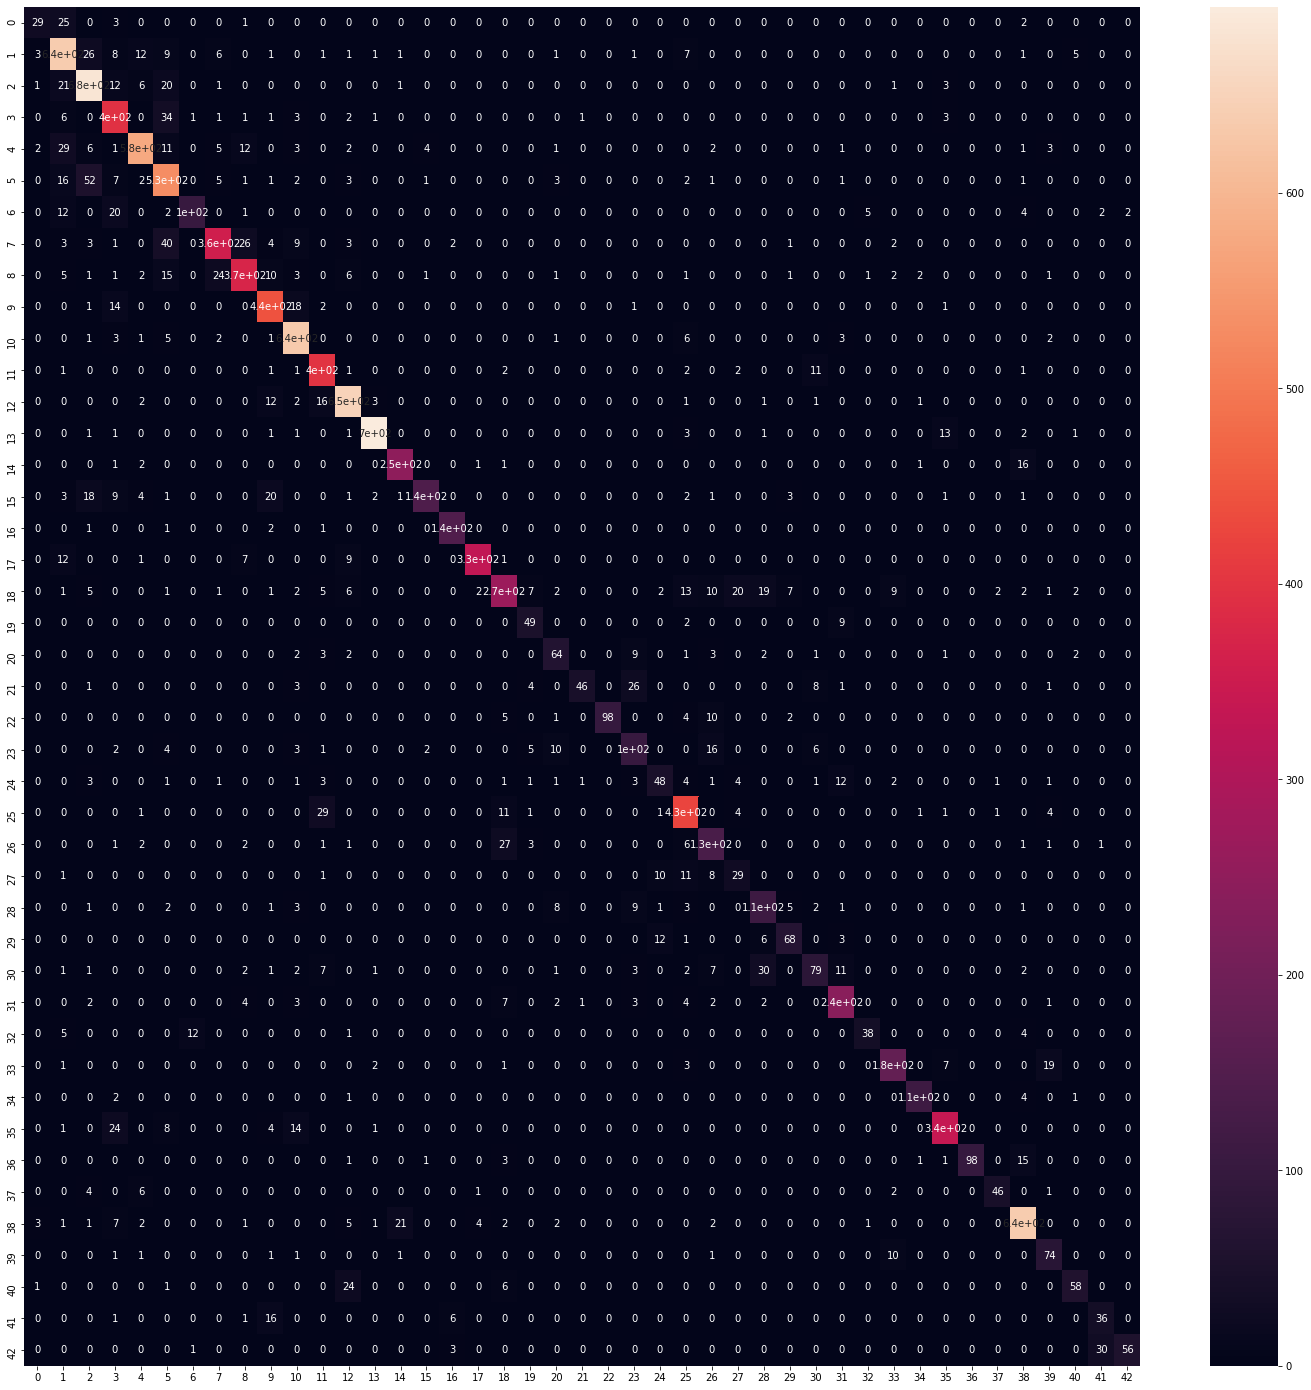

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, classes_x)
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)

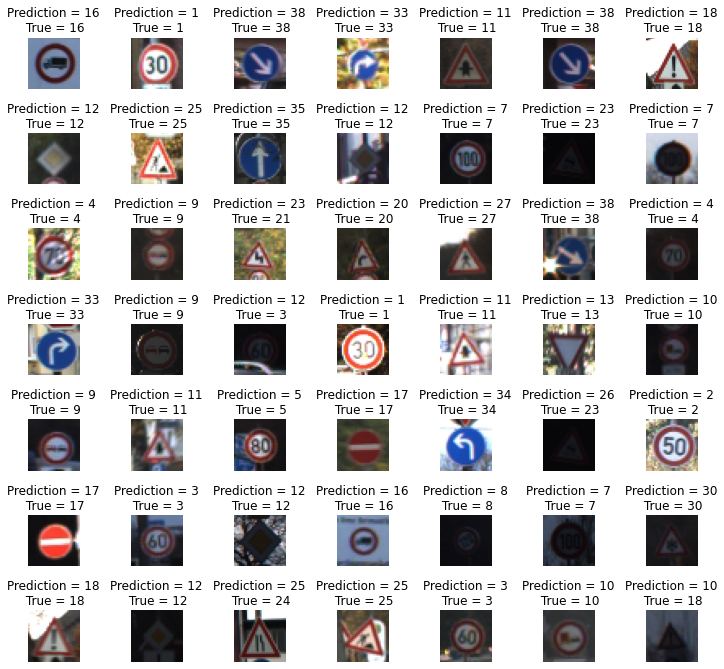

In [89]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(classes_x[i], y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)